## CROP PRICE PREDICTION

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.simplefilter(action='ignore',category=UserWarning)

In [2]:
## Importing the dataset
data= pd.read_csv('../data/price-dataset.csv')
data.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,22-05-2019
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,22-05-2019
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,22-05-2019
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,22-05-2019
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,22-05-2019


### Data Cleaning

In [3]:
dataset= data.head(800000)

In [4]:
## Selecting only those rows which has the crop/commodity name present in crop recommendation dataset
crop= ['Rice', 'Maize', 'Chickpea', 'Beans', 'Arhar Dal', 'Moath Dal','Moong Dal', 'Urad Dal', 'Masur Dal', 
       'Pomegranate','Banana','Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple', 'Orange','Papaya', 
       'Coconut', 'Cotton', 'Jute', 'Coffee'] 
dataset = dataset.loc[dataset['commodity_name'].isin(crop)]
dataset.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date
75,Apple,Chattisgarh,Durg,Durg,60.0,80.0,70.0,22-05-2019
76,Apple,Haryana,Karnal,Asandh,40.0,45.0,44.0,22-05-2019
77,Apple,Haryana,Faridabad,Ballabhgarh,80.0,90.0,85.0,22-05-2019
78,Apple,Haryana,Hissar,Barwala(Hisar),90.0,90.0,90.0,22-05-2019
79,Apple,Haryana,Bhiwani,Ch. Dadri,80.0,100.0,90.0,22-05-2019


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131255 entries, 75 to 799998
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   commodity_name  131255 non-null  object 
 1   state           131255 non-null  object 
 2   district        131255 non-null  object 
 3   market          131255 non-null  object 
 4   min_price       131255 non-null  float64
 5   max_price       131255 non-null  float64
 6   modal_price     131255 non-null  float64
 7   date            131255 non-null  object 
dtypes: float64(3), object(5)
memory usage: 9.0+ MB


In [6]:
dataset= dataset.reset_index(drop=True)
dataset.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,Apple,Chattisgarh,Durg,Durg,60.0,80.0,70.0,22-05-2019
1,Apple,Haryana,Karnal,Asandh,40.0,45.0,44.0,22-05-2019
2,Apple,Haryana,Faridabad,Ballabhgarh,80.0,90.0,85.0,22-05-2019
3,Apple,Haryana,Hissar,Barwala(Hisar),90.0,90.0,90.0,22-05-2019
4,Apple,Haryana,Bhiwani,Ch. Dadri,80.0,100.0,90.0,22-05-2019


##### Preparing the season,month and day of week column from date column

In [7]:
## Month dictionary object
month_dictionary = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",
                   10:"October",11:"November",12:"December"}
month_dictionary

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

In [8]:
## Creating month column
month= []
for date in dataset['date']:
    entry = str(date).split('-')
    month.append(month_dictionary[int(entry[1])])
dataset['month']=month
dataset.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date,month
0,Apple,Chattisgarh,Durg,Durg,60.0,80.0,70.0,22-05-2019,May
1,Apple,Haryana,Karnal,Asandh,40.0,45.0,44.0,22-05-2019,May
2,Apple,Haryana,Faridabad,Ballabhgarh,80.0,90.0,85.0,22-05-2019,May
3,Apple,Haryana,Hissar,Barwala(Hisar),90.0,90.0,90.0,22-05-2019,May
4,Apple,Haryana,Bhiwani,Ch. Dadri,80.0,100.0,90.0,22-05-2019,May


In [9]:
## Creating season column
season=[]

for month in dataset['month']:
    if month =='January' or month =='February':
        season.append('Winter')
    elif month=='March' or month=='April':
        season.append('Spring')
    elif month=='May' or month =='June':
        season.append('Summer')
    elif month=='July' or month=='August':
        season.append('Moonsoon')
    elif month=='September' or month=='October':
        season.append('Autumn')
    elif month=='November' or month=='December':
        season.append('Pre Winter')
        
dataset['Season']=season
dataset.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date,month,Season
0,Apple,Chattisgarh,Durg,Durg,60.0,80.0,70.0,22-05-2019,May,Summer
1,Apple,Haryana,Karnal,Asandh,40.0,45.0,44.0,22-05-2019,May,Summer
2,Apple,Haryana,Faridabad,Ballabhgarh,80.0,90.0,85.0,22-05-2019,May,Summer
3,Apple,Haryana,Hissar,Barwala(Hisar),90.0,90.0,90.0,22-05-2019,May,Summer
4,Apple,Haryana,Bhiwani,Ch. Dadri,80.0,100.0,90.0,22-05-2019,May,Summer


In [10]:
## Creating a day of week column
day_of_week = []

for date in dataset['date']:
    entry = pd.Timestamp(str(date))
    day_of_week.append(entry.dayofweek)

dataset['Day']=day_of_week
dataset.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date,month,Season,Day
0,Apple,Chattisgarh,Durg,Durg,60.0,80.0,70.0,22-05-2019,May,Summer,2
1,Apple,Haryana,Karnal,Asandh,40.0,45.0,44.0,22-05-2019,May,Summer,2
2,Apple,Haryana,Faridabad,Ballabhgarh,80.0,90.0,85.0,22-05-2019,May,Summer,2
3,Apple,Haryana,Hissar,Barwala(Hisar),90.0,90.0,90.0,22-05-2019,May,Summer,2
4,Apple,Haryana,Bhiwani,Ch. Dadri,80.0,100.0,90.0,22-05-2019,May,Summer,2


In [11]:
## Dropping the date column
dataset.drop('date',axis=1,inplace=True)
dataset.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,month,Season,Day
0,Apple,Chattisgarh,Durg,Durg,60.0,80.0,70.0,May,Summer,2
1,Apple,Haryana,Karnal,Asandh,40.0,45.0,44.0,May,Summer,2
2,Apple,Haryana,Faridabad,Ballabhgarh,80.0,90.0,85.0,May,Summer,2
3,Apple,Haryana,Hissar,Barwala(Hisar),90.0,90.0,90.0,May,Summer,2
4,Apple,Haryana,Bhiwani,Ch. Dadri,80.0,100.0,90.0,May,Summer,2


### Exploratory Data Analysis

<AxesSubplot:xlabel='modal_price'>

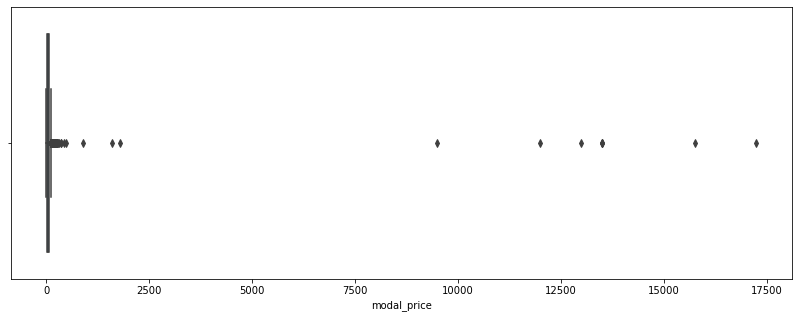

In [12]:
plt.figure(figsize=(14,5))
sns.boxplot(dataset['modal_price'])

<AxesSubplot:xlabel='commodity_name', ylabel='modal_price'>

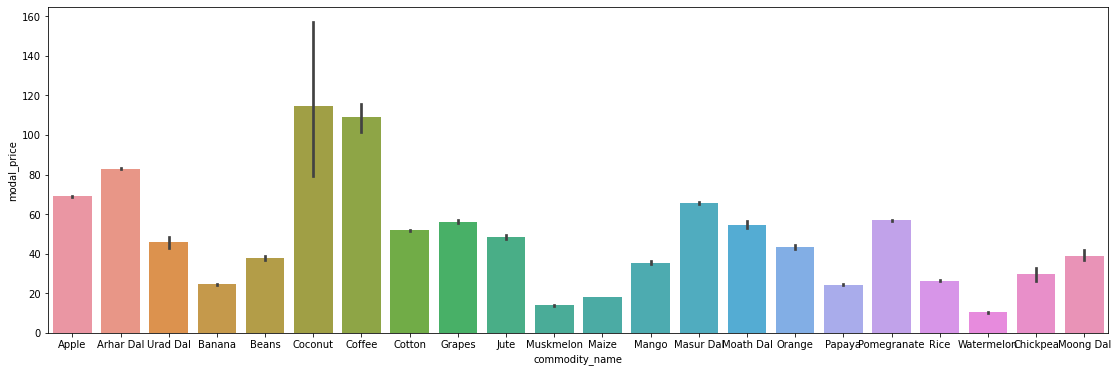

In [13]:
plt.figure(figsize=(19,6))
sns.barplot(data=dataset,x='commodity_name',y='modal_price')

<AxesSubplot:xlabel='month', ylabel='modal_price'>

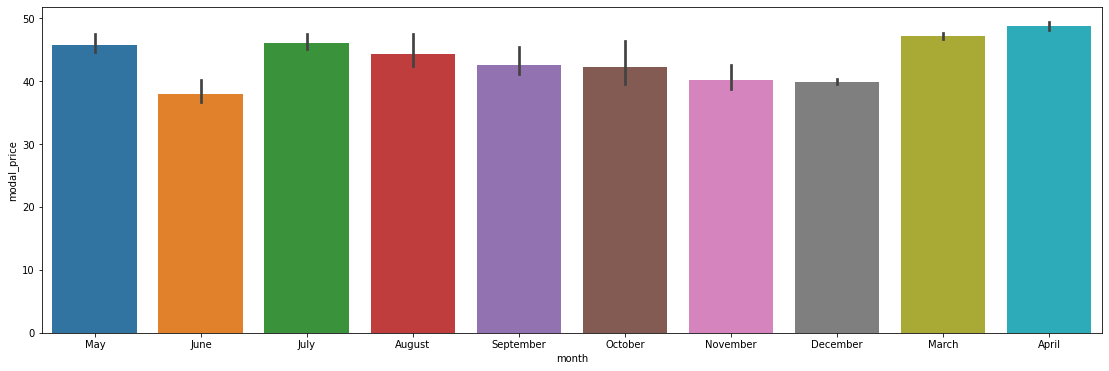

In [14]:
plt.figure(figsize=(19,6))
sns.barplot(data=dataset,x='month',y='modal_price')

<AxesSubplot:xlabel='commodity_name', ylabel='count'>

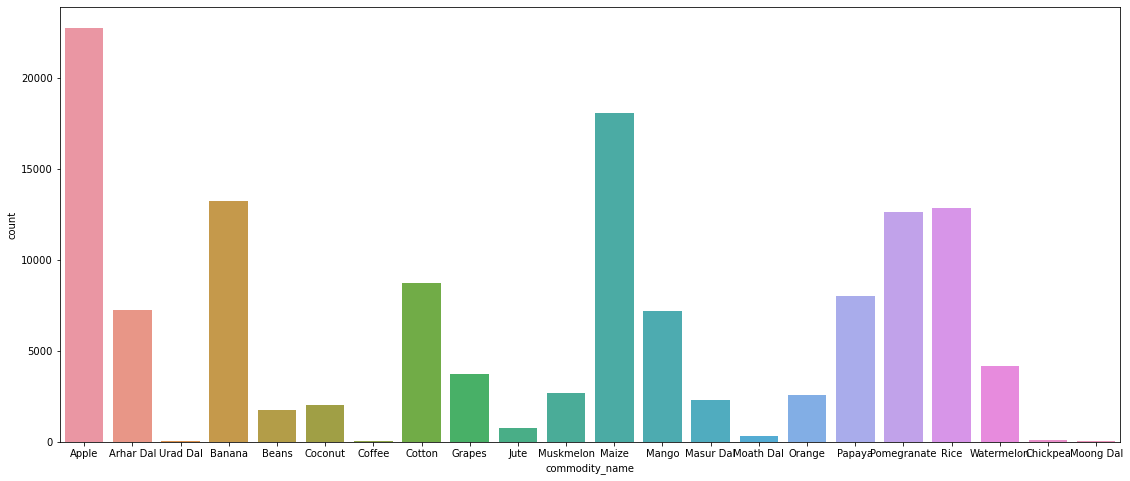

In [15]:
plt.figure(figsize=(19,8))
sns.countplot(data=dataset,x='commodity_name')

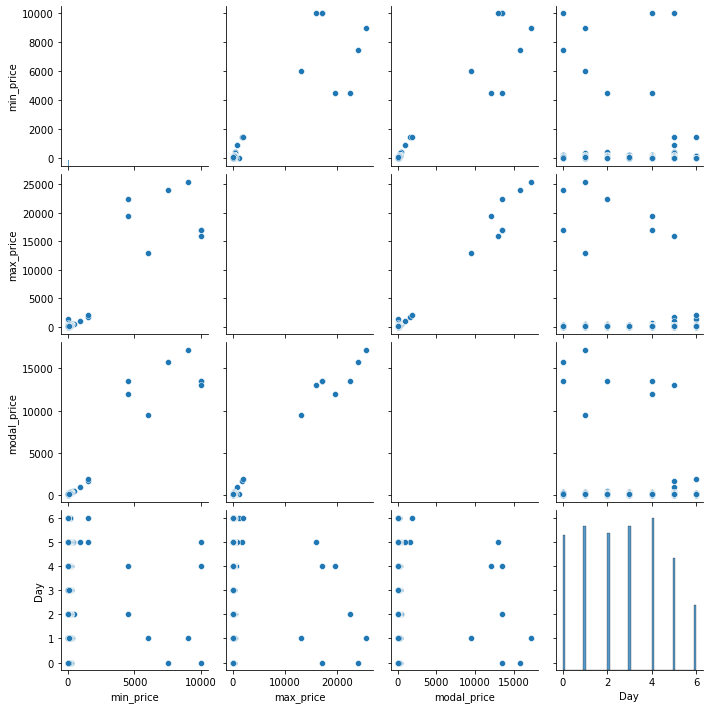

In [16]:
sns.pairplot(dataset)

<AxesSubplot:xlabel='max_price', ylabel='Density'>

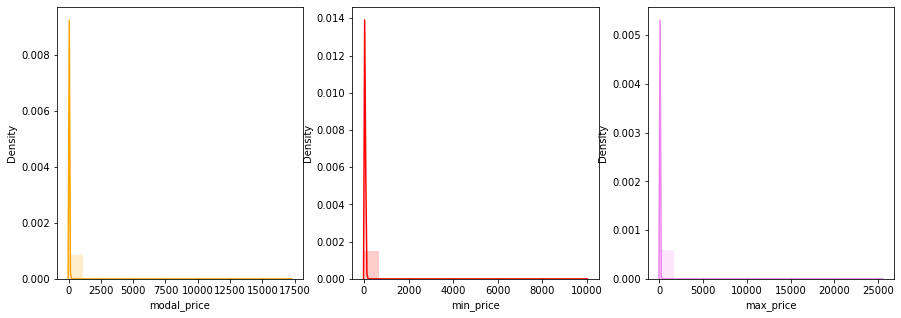

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.distplot(dataset['modal_price'],color="orange",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 3, 2)
sns.distplot(dataset['min_price'],color="red",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 3, 3)
sns.distplot(dataset['max_price'],color="violet",bins=15,hist_kws={'alpha':0.2})

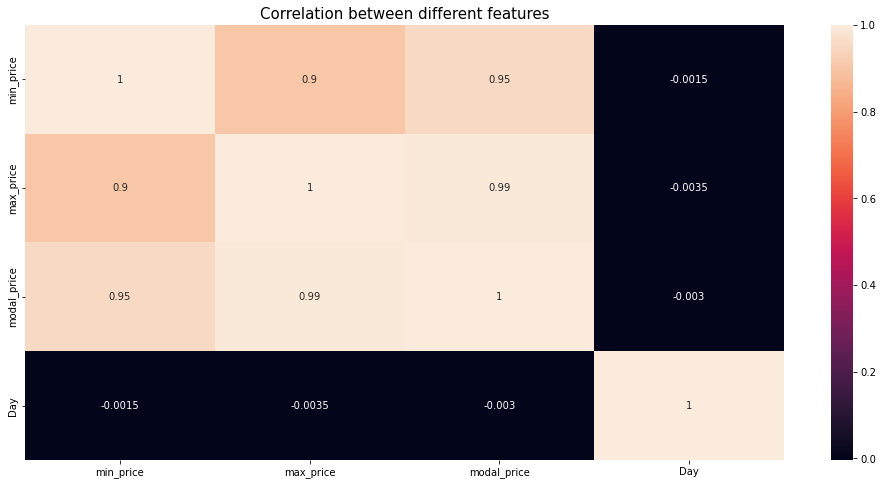

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(17, 8))
sns.heatmap(dataset.corr(), annot=True )
plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

### Feature Engineering

In [19]:
## Removing the Outliers
## IQR

Q1 = np.percentile(dataset['modal_price'],25,interpolation='midpoint')
Q3 = np.percentile(dataset['modal_price'],75,interpolation='midpoint')

IQR = Q3-Q1
IQR

37.7

In [20]:
## Calculating the upper bound and lower bound 
upper = np.where(dataset['modal_price'] >= (Q3+1.5*IQR))

lower = np.where(dataset['modal_price'] <= (Q1-1.5*IQR))
upper[0]

array([    12,     14,     18, ..., 131236, 131243, 131248], dtype=int64)

In [21]:
## Removing the Outliers
dataset.drop(upper[0],inplace=True)
dataset.drop(lower[0],inplace=True)

## New data shape
dataset.shape

(128901, 10)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128901 entries, 0 to 131254
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   commodity_name  128901 non-null  object 
 1   state           128901 non-null  object 
 2   district        128901 non-null  object 
 3   market          128901 non-null  object 
 4   min_price       128901 non-null  float64
 5   max_price       128901 non-null  float64
 6   modal_price     128901 non-null  float64
 7   month           128901 non-null  object 
 8   Season          128901 non-null  object 
 9   Day             128901 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 10.8+ MB


In [23]:
df = dataset.copy()

from sklearn.preprocessing import LabelEncoder

crop_le= LabelEncoder()
dataset['commodity_name'] = crop_le.fit_transform(dataset['commodity_name'])

state_le = LabelEncoder()
dataset['state'] = state_le.fit_transform(dataset['state'])

month_le = LabelEncoder()
dataset['month'] = month_le.fit_transform(dataset['month'])

season_le = LabelEncoder()
dataset['Season'] = season_le.fit_transform(dataset['Season'])

dataset.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,month,Season,Day
0,0,2,Durg,Durg,60.0,80.0,70.0,6,4,2
1,0,5,Karnal,Asandh,40.0,45.0,44.0,6,4,2
2,0,5,Faridabad,Ballabhgarh,80.0,90.0,85.0,6,4,2
3,0,5,Hissar,Barwala(Hisar),90.0,90.0,90.0,6,4,2
4,0,5,Bhiwani,Ch. Dadri,80.0,100.0,90.0,6,4,2


In [24]:
dataset.drop(['market','district'],axis=1,inplace=True)
dataset.head()

,commodity_name,state,min_price,max_price,modal_price,month,Season,Day
0,0,2,60.0,80.0,70.0,6,4,2
1,0,5,40.0,45.0,44.0,6,4,2
2,0,5,80.0,90.0,85.0,6,4,2
3,0,5,90.0,90.0,90.0,6,4,2
4,0,5,80.0,100.0,90.0,6,4,2


In [25]:
features = dataset[['commodity_name', 'state', 'month', 'Season', 'Day']]
label = dataset['modal_price']

## Spliting into train and test data

from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest= train_test_split(features,label,test_size=0.2,random_state=2)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128901 entries, 0 to 131254
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   commodity_name  128901 non-null  int32  
 1   state           128901 non-null  int32  
 2   min_price       128901 non-null  float64
 3   max_price       128901 non-null  float64
 4   modal_price     128901 non-null  float64
 5   month           128901 non-null  int32  
 6   Season          128901 non-null  int32  
 7   Day             128901 non-null  int64  
dtypes: float64(3), int32(4), int64(1)
memory usage: 6.9 MB


In [27]:
dataset.columns

Index(['commodity_name', 'state', 'min_price', 'max_price', 'modal_price',
       'month', 'Season', 'Day'],
      dtype='object')

### Model Training

In [28]:
## Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, features,label, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [29]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(Xtrain,ytrain)

test_pred = lin_reg.predict(Xtest)
train_pred = lin_reg.predict(Xtrain)

print('Train set evaluation:\n_____________________________________')
print_evaluate(ytrain, train_pred)

print('Test set evaluation:\n_____________________________________')
print_evaluate(ytest, test_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(ytest, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Train set evaluation:
_____________________________________
MAE: 18.911656931911168
MSE: 521.0588446909907
RMSE: 22.82671340099119
R2 Square 0.16240782222903116
__________________________________
Test set evaluation:
_____________________________________
MAE: 18.904785990130954
MSE: 522.2289854729104
RMSE: 22.852329979083322
R2 Square 0.16342651181597467
__________________________________


In [30]:
## Ridge Regression

from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(Xtrain, ytrain)
pred = model.predict(Xtest)

test_pred = model.predict(Xtest)
train_pred = model.predict(Xtrain)

print('Train set evaluation:\n_____________________________________')
print_evaluate(ytrain, train_pred)

print('Test set evaluation:\n_____________________________________')
print_evaluate(ytest, test_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(ytest, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Train set evaluation:
_____________________________________
MAE: 18.91167814360979
MSE: 521.0588449496024
RMSE: 22.826713406655863
R2 Square 0.1624078218133178
__________________________________
Test set evaluation:
_____________________________________
MAE: 18.90480774023433
MSE: 522.2289100489161
RMSE: 22.852328328835906
R2 Square 0.1634266326398197
__________________________________


In [31]:
# Lasso Regression

from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(Xtrain, ytrain)

test_pred = model.predict(Xtest)
train_pred = model.predict(Xtrain)

print('Train set evaluation:\n_____________________________________')
print_evaluate(ytrain, train_pred)

print('Test set evaluation:\n_____________________________________')
print_evaluate(ytest, test_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(ytest, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Train set evaluation:
_____________________________________
MAE: 21.18957825767956
MSE: 617.0892328026298
RMSE: 24.841280820493733
R2 Square 0.008040800672531101
__________________________________
Test set evaluation:
_____________________________________
MAE: 21.269387663730477
MSE: 619.8168674061228
RMSE: 24.896121533406017
R2 Square 0.007097703832578572
__________________________________


In [32]:
## ElasticNet Regression

from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(Xtrain, ytrain)

test_pred = model.predict(Xtest)
train_pred = model.predict(Xtrain)

print('Train set evaluation:\n_____________________________________')
print_evaluate(ytrain, train_pred)

print('Test set evaluation:\n_____________________________________')
print_evaluate(ytest, test_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(ytest, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Train set evaluation:
_____________________________________
MAE: 18.91305839200469
MSE: 521.0652661439898
RMSE: 22.82685405709665
R2 Square 0.16239749986552687
__________________________________
Test set evaluation:
_____________________________________
MAE: 18.906401748256354
MSE: 522.228719390826
RMSE: 22.852324157311134
R2 Square 0.16342693806044528
__________________________________


In [33]:
## Decision Tree 

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=44)
model.fit(Xtrain, ytrain)

test_pred = model.predict(Xtest)
train_pred = model.predict(Xtrain)

print('Train set evaluation:\n_____________________________________')
print_evaluate(ytrain, train_pred)

print('Test set evaluation:\n_____________________________________')
print_evaluate(ytest, test_pred)

results_df_2 = pd.DataFrame(data=[["Decision Tree", *evaluate(ytest, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Train set evaluation:
_____________________________________
MAE: 5.445547915207835
MSE: 76.14566400670478
RMSE: 8.726148291583451
R2 Square 0.8775972940618331
__________________________________
Test set evaluation:
_____________________________________
MAE: 6.164467113203942
MSE: 99.55928834379056
RMSE: 9.977940085197472
R2 Square 0.840513139929487
__________________________________


In [34]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(max_depth=1000, random_state=0)
rf_reg.fit(Xtrain, ytrain)

test_pred = rf_reg.predict(Xtest)
train_pred = rf_reg.predict(Xtrain)

print('Train set evaluation:\n_____________________________________')
print_evaluate(ytrain, train_pred)

print('Test set evaluation:\n_____________________________________')
print_evaluate(ytest, test_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(ytest, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Train set evaluation:
_____________________________________
MAE: 5.525343345532062
MSE: 76.89643272691474
RMSE: 8.76906110863157
R2 Square 0.8763904476302444
__________________________________
Test set evaluation:
_____________________________________
MAE: 6.096290648317561
MSE: 95.47399163885285
RMSE: 9.771079348713368
R2 Square 0.8470574930959845
__________________________________


<AxesSubplot:ylabel='Model'>

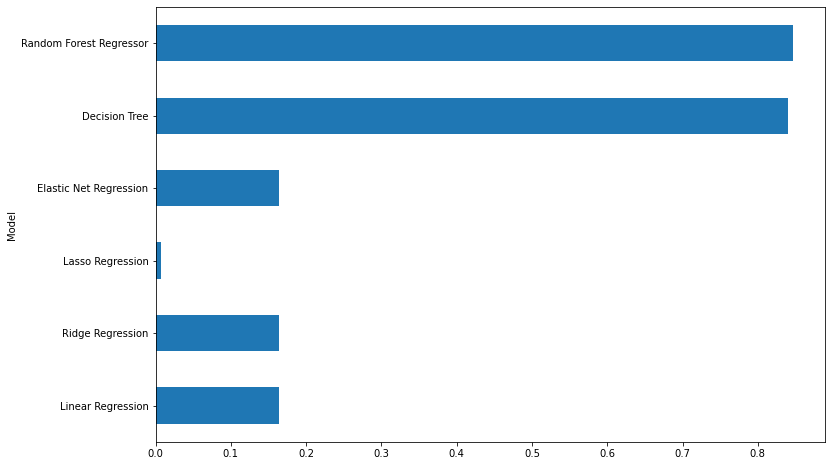

In [35]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

In [36]:
## Saving the Random Forest since it is generalized model since it has more R2 score conmpare to all other models
import pickle

RF_pkl_filename = '../model/RandomForestPredicition.pkl'

RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(rf_reg, RF_Model_pkl)


RF_Model_pkl.close()

In [37]:
## Saving the LabelEnconders

pickle.dump(crop_le, open('../Prep/crop.pkl', 'wb'))
pickle.dump(state_le, open('../Prep/state.pkl', 'wb'))
pickle.dump(month_le, open('../Prep/month.pkl', 'wb'))
pickle.dump(season_le, open('../Prep/season.pkl', 'wb'))
